In [1]:
import numpy as np
import numpy.linalg as LA
from scipy import integrate
import matplotlib.pyplot as plt

## Метод колокації

Маємо інтегральне рівняння вигляду

$$
\dots
$$

Наближений розв'язок будемо шукати у вигляді

 $$
 \tilde{\psi_k}(x)=\sum_{j=1}^{n} c^{(k)}_{j} \gamma^{(k)}_{j}(x), \quad k = 1,2
 $$

де $c_j$ - невідомі константи, які потрібно знайти, а $\gamma_j$ - задані лінійнонезалежні функції (в нашому випадку кусково аналітичні), $j = 1, ..., n$.

Розглянувши його на множині точок $x_i$, таких, що
$$
a \leqslant x_{1}<x_{2}<\ldots<x_{m} \leqslant b
$$

отримаємо СЛАР відносно невідомих $с^{(k)}_j$, $j = 1, ..., n$. 

 $$
 A =
 \begin{pmatrix}
	 \begin{matrix}
	 	G^{(1)}_{11} & \dots  & G^{(1)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(1)}_{n1} & 		  & G^{(1)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
	 	G^{(2)}_{11} & \dots  & G^{(2)}_{1n} \\
	 	\vdots 		 & \ddots & \\
	 	G^{(2)}_{n1} & 		  & G^{(2)}_{nn} \\
	 \end{matrix} \\
	 \begin{matrix}
		G^{(3)}_{11} & \dots  & G^{(3)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(3)}_{n1} & 		  & G^{(3)}_{nn} \\
	 \end{matrix} &
	 \begin{matrix}
		G^{(4)}_{11} & \dots  & G^{(4)}_{1n} \\
		\vdots 		 & \ddots & \\
		G^{(4)}_{n1} & 		  & G^{(4)}_{nn} \\
	 \end{matrix} \\
 \end{pmatrix}
 c = 
 \begin{pmatrix}
	c^{(1)}_1\\
	\vdots\\
	c^{(1)}_n\\
	c^{(2)}_1\\
	\vdots\\
	c^{(2)}_n\\
 \end{pmatrix}
 g = 
 \begin{pmatrix}
	2\pi g_1(x_1)\\
	\vdots\\
	2\pi g_1(x_n)\\
	2\pi g_2(x_1)\\
	\vdots\\
	2\pi g_2(x_n)\\
 \end{pmatrix}
 $$

For the full discretization of the integral equation of the first kind $(3.5),$ which has a logarithmic singularity, we apply a quadrature method together with the quadrature rule [13,14] based on trigonometric interpolation. For this purpose, we choose an equidistant mesh by setting $t_{i}:=i \pi / M, i=0, \ldots, 2 M-1, M \in \mathbb{N}$ and use the quadrature rules
 $$
 \begin{array}{c}
 	\frac{1}{2 \pi} \int_{0}^{2 \pi} f(\tau) d \tau \approx \frac{1}{2 M} \sum_{j=0}^{2 M-1} f\left(t_{j}\right) \\
 	 \int_{0}^{2 \pi} f(\tau) \ln \left(\frac{4}{e} \sin ^{2} \frac{t-\tau}{2}\right) d \tau \approx {2 \pi}\sum_{j=0}^{2 M-1} R_{j}(t) f\left(t_{j}\right)
 \end{array}
 $$
 with known weight functions $R_{j}$ (see [13]).
 
 $$
 R_{j}(t)=-\frac{1}{n} \sum_{m=1}^{n-1} \frac{1}{m} \cos m\left(t-t_{j}\right)+\frac{1}{2 n} \cos n\left(t-t_{j}\right)
 $$
 

In [2]:
a, b = 0, 2*np.pi


r1 = 0.9
r2 = 2
M = 15
eps = 1e-10


x1 = lambda t: (r1*np.cos(t), r1*np.sin(t))
x2 = lambda t: (r2*np.cos(t), r2*np.sin(t))
dx1 = lambda t: (-r1*np.sin(t), r1*np.cos(t))
dx2 = lambda t: (-r2*np.sin(t), r2*np.cos(t))
ddx2 = lambda t: (-r2*np.cos(t), -r2*np.sin(t))

g1 = lambda t: 1
g2 = lambda t: 0

u = lambda x, y : 1

In [3]:

# x1 = lambda t: (r1*np.cos(t), r1*np.sin(t))
# x2 = lambda t: (r2*np.cos(t), r2*np.sin(t))
# dx1 = lambda t: (-r1*np.sin(t), r1*np.cos(t))
# dx2 = lambda t: (-r2*np.sin(t), r2*np.cos(t))
# ddx2 = lambda t: (-r2*np.cos(t), -r2*np.sin(t))

# g1 = lambda t: x1(t)**2 
# g2 = lambda t: 0

# def g1(t):
#     x, y = x1(t)
#     return x**2 - y**2

# def g2(t):
#     x, y = x2(t)
#     v = np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))
#     grad = np.array([2*x, 2*y])
    
#     return np.dot(grad, v)

# u = lambda x, y : x**2 - y**2



$$
K_{1}(t, \tau)=\frac{\left(\bar{x}_{1}(\tau)-\bar{x}_{2}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{\left|x_{2}(t)-x_{1}(\tau)\right|^{2}}
$$
$$
K_{2}(t, \tau)=\left\{\begin{array}{l}
\frac{\left(\bar{x}_{2}(\tau)-\bar{x}_{2}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{\left|x_{2}(t)-x_{2}(\tau)\right|^{2}}, \quad \text { Якщо } t \neq \tau \\
\frac{\left(\bar{x}_{2}^{\prime \prime}(t), \bar{\nu}\left(x_{2}(t)\right)\right)}{2\left|x_{2}^{\prime}(t)\right|^{2}}, \quad \text { якщо } t=\tau
\end{array}\right.
$$


In [4]:
def nu_x2(t):
    return np.array([dx2(t)[1], -dx2(t)[0]]) / LA.norm(dx2(t))

def K11_1(t, tau):
    return -1/2

def K11_2(t, tau):
    if np.abs(t - tau) > eps:
        return 1/2*np.log( 4/np.e * np.sin((t - tau)/2)**2 \
                 / LA.norm(np.subtract(x1(t), x1(tau)))**2)
    else:
        return 1/2*np.log(1/(np.e * LA.norm(dx1(t))**2))

def K12(t, tau):
    return np.log(1/(LA.norm(np.subtract(x1(t), x2(tau)))))

def K21(t, tau):
    return np.dot(np.subtract(x1(tau), x2(t)), nu_x2(t)) \
            / LA.norm(np.subtract(x2(t), x1(tau)))**2

def K22(t, tau):
    if np.abs(t - tau) > eps:
        return np.dot(np.subtract(x2(tau), x2(t)), nu_x2(t)) \
                / LA.norm(np.subtract(x2(t), x2(tau)))**2
    else:
        return np.dot(ddx2(t), nu_x2(t)) / ((2*LA.norm(dx2(t)))**2)


In [5]:
# def Collocation(xx):
#     n = len(xx)
# #     integral = lambda a, b: 
    
#     def collocate(K, term=basicFunction):
#         A = np.zeros([n, n])

#         for i in range(n):
#             for j in range(n):
#                 Kxi_li = lambda s: K(xx[i], s) * basicFunction(j, s)

#                 if (j == 0):
#                     (quad, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
#                 elif (j == n - 1):
#                     (quad, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
#                 else:
#                     (quad, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])

# #                A[i][j] = basicFunction(j, xx[i]) + (- integral)
#                 A[i][j] = term(j, xx[i]) + quad

#         return A
    
#     return collocate

In [6]:
# collocate = Collocation(xx)

$$
G^{(1)}_{ji} = \int_{0}^{2\pi} \gamma^{(1)}_{j}(\tau) K_{11}(t_i, \tau) d \tau
$$

In [7]:
# # G1 = np.zeros((n,n)).tolist()
# # for i in range(n):
# #   for j in range(n):
# #     K_1 = quadrature_with_ln_special_case(lambda s: K11_1(xx[i], s)*basicFunction(j, s))(xx[i])

# #     (K_2, err) = integrate.quad(lambda s: K11_2(xx[i], s)*basicFunction(j, s), a, b)

    
# #     G1[i][j] = K_1 + K_2
# G1 = np.zeros((n,n)).tolist()
# for i in range(n):
#     for j in range(n):
#         Kxi_li = lambda s: K11_2(xx[i], s) * basicFunction(j, s)

#         K_1 = 2 * np.pi * quadrature_with_ln_special_case(lambda s: K11_1(xx[i], s)*basicFunction(j, s))(xx[i])

#         if (j == 0):
#             (K_2, err) = integrate.quad(Kxi_li, xx[j], xx[j + 1])
#         elif (j == n - 1):
#             (K_2, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j])
#         else:
#             (K_2, err) = integrate.quad(Kxi_li, xx[j - 1], xx[j + 1])

#         G1[i][j] = K_1 + K_2


$$
G^{(2)}_{ji} = \int_{0}^{2\pi} \gamma^{(2)}_{j}(\tau) K_{12}(t_i, \tau) d \tau
$$

In [8]:
# G2 = collocate(K12)

$$
G^{(3)}_{ji} = \int_{0}^{2\pi} \gamma^{(1)}_{j}(\tau) K_{21}(t_i, \tau) d \tau
$$

In [9]:
# G3 = collocate(K21)

$$
G^{(4)}_{ji} = -\pi\frac{\gamma^{(2)}_{j}(t_i)}{|x'_{2}(t_i))|}
				 + \int_{0}^{2\pi} \gamma^{(2)}_{j}(\tau) K_{22}(t_i, \tau) d \tau
$$

In [10]:
# G4 = collocate(K22, term=lambda j, x: -np.pi * basicFunction(j, x) / LA.norm(dx2(x)))
# # for i in range(n):
# #   for j in range(n):
    
# #     Kxi_li= lambda s: K22(xx[i], s) * basicFunction(j, s)
    
# #     (integral, err) = integrate.quad(Kxi_li, a, b)
    
# #     G4[i][j] = integral - np.pi * basicFunction(j, xx[i]) / LA.norm(dx2(xx[i]))

In [11]:
def R_j( M, t, tj ):
    sum = 0;
    for m in range(1, M-1):
        sum = sum + np.cos(m*(t-tj))/m;     
    
    return -1/(2*M)*(2*sum + np.cos(M*(t-tj))/M); 

In [12]:
a, b = 0, 2*np.pi

r1 = 2
r2 = 4
M = 10
eps = 1e-10


x1 = lambda t: (r1*np.cos(t), r1*np.sin(t))
x2 = lambda t: (r2*np.cos(t), r2*np.sin(t))
dx1 = lambda t: (-r1*np.sin(t), r1*np.cos(t))
dx2 = lambda t: (-r2*np.sin(t), r2*np.cos(t))
ddx2 = lambda t: (-r2*np.cos(t), -r2*np.sin(t))

g1 = lambda t: 1
g2 = lambda t: 0

u = lambda x, y : 1

In [13]:
# def basicFunction(j, x, xx=t, h=h):
#     n = len(xx) - 1
    
#     if j >=1 and xx[j-1] <= x <= xx[j]:
#         return (x - xx[j-1])/h
#     elif j <= n-1 and xx[j] <= x <= xx[j+1]:
#         return (xx[j+1] - x)/h
#     else:
#         return 0

In [14]:
# def quadrature_with_ln_special_case(f, M=100):
#     '''integral from 0 to 2pi'''

#     tt = [i*np.pi/M for i in range(2*M)]

#     R = lambda i, t: -1/(2*M) * (1 + 2*sum([(1/m) * np.cos(m * (t - tt[i])) + 1/(M) * np.cos(t - tt[i])
#                                              for m in range(1, M)]))
  
#     def integral(t):
#         return sum([R(j,t)*f(tt[j]) for j in range(2*M)])
  
#     return integral

In [15]:
M = 5
h = (b - a) / (2*M)
t = [ (np.pi*j)/M for j in range(2*M)]

A = np.zeros([4*M, 4*M])
g = np.zeros([4*M, 1])
psi1 = np.zeros([2*M, 1])
psi2 = np.zeros([2*M, 1])

def basicFunction(j, x, xx=t, h=h):
    n = len(xx) - 1
    
    if j >=1 and xx[j-1] <= x <= xx[j]:
        return (x - xx[j-1])/h
    elif j <= n-1 and xx[j] <= x <= xx[j+1]:
        return (xx[j+1] - x)/h
    else:
        return 0



print(M)

for i in range(2*M):
    for j in range(2*M):
        K_1 = R_j(M, t[i], t[j])

        # K11
        A[i][j] =  (K11_2(t[i], t[j])) / (2*M)
        A[i][j] += K11_1(t[i], t[j]) * K_1
        
        # K12
        A[i][j + 2*M] = K12(t[i], t[j]) / (2*M)
        
        # K21
        A[i + 2*M][j] = K21(t[i], t[j]) / (2*M)
        
        # K22
        A[i + 2*M][j + 2*M] = K22(t[i], t[j]) / (2*M)
    
    A[i + 2*M][j + 2*M] -= 0.5 / LA.norm(dx2(t[i]))
    
    g[i] = g1(t[i])
    g[i + 2*M] = g2(t[i])

    

print(LA.det(A))
c = LA.solve(A, g)

for i in range(2*M):
    psi1[i] = c[i]
    psi2[i] = c[i + 2*M]

5
-2.627934249772836e-27


In [16]:
K1 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x1(tau))))
K2 = lambda x, tau: np.log(1/LA.norm(np.subtract(x, x2(tau))))

In [17]:
def u_approx(x, M=M, a=a, b=b):
    '''
    x є R2, тобто х - вектор з двох чисел
    n - кількість точок в розбитті

    '''
    t = [ (np.pi*j)/M for j in range(2*M)]
    
    u = 0
    for j in range(2*M):
        u = u + psi1[j] * K1(x, t[j])
        u = u + psi2[j] * K2(x, t[j])
        
    u = u / (2*M)
    
    return u

In [18]:
# g = np.concatenate(([[g1(xx[j])] for j in range(n)],
#                     [[g2(xx[j])] for j in range(n)]))
# g.shape

In [19]:
# 2*np.pi*g

In [20]:
LA.det(A)

-2.627934249772836e-27

In [21]:
c = LA.solve(A, 2*np.pi*g)
#c

In [22]:
# def psi1_approx(t, c=c):
#     return sum(c[i][0]*basicFunction(i, t) for i in range(n))

# def psi2_approx(t, c=c):
#     return sum(c[n + i][0]*basicFunction(i, t) for i in range(n))

In [23]:
# def u_approx(x):
#   '''x є R2, тобто х - вектор з двох чисел'''
#   return 1/(2*np.pi)*np.array([
#           integrate.quad(lambda tau: psi1_approx(tau)*K1(x, tau), a, b)[0]
#         + integrate.quad(lambda tau: psi2_approx(tau)*K2(x, tau), a, b)[0]
#   ])


In [24]:
# def u_approx(x, n=100, a=a, b=b):
#   '''
#   x є R2, тобто х - вектор з двох чисел
#   n - кількість точок в розбитті
  
#   '''
#   mesh = np.linspace(a, b, n)
  
#   under_int_f1 = lambda tau: psi1_approx(tau)*K1(x, tau)
#   under_int_f2 = lambda tau: psi2_approx(tau)*K2(x, tau)
  
#   return 1/(2*np.pi)*np.array([
#           integrate.trapz([under_int_f1(m) for m in mesh], x=mesh)
#         + integrate.trapz([under_int_f2(m) for m in mesh], x=mesh)
#   ])


In [25]:
# print(u_approx([2, 0]))
# print(u_approx([-2, 0]))

# u_approx([1, 1.8])
# 5 -  0.9871786525643987
# 10 - 1.0688819870429056
# 20 - 0.9365487037140583
# 40 - 1.548480787828013


# u_approx([-2, 0])
# 5 -  0.9350926047902689
# 10 - 0.9340022800705414
# 20 - 0.9125045720554292
# 40 - 0.8170593044775045

# 1,0 -1,0 - gorbuli - min
# 0,1 0, -1 - max


print(u_approx([3, 0]))
#-1.2471739749461814
# 5 - 1.84487585
# 10 - 2.01139392
# 15 - 2.06183026
# 20 - 2.15689248
# 30 - 2.21076507
# 40 - 2.27345622

[1.39322081]


<ipython-input-26-eb53820013bb>:7: RuntimeWarning: invalid value encountered in sqrt
  Yc = np.sqrt(1-Xc**2)


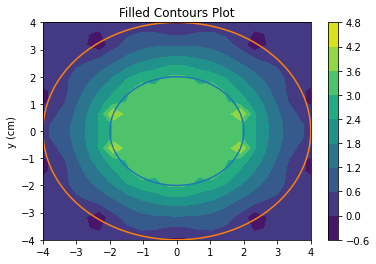

In [26]:
xxx = np.linspace(0, 2*np.pi, 100)
yyy = np.linspace(0, 2*np.pi, 100)

xxxx=np.linspace(-r2, r2, 100)
zzzz=np.linspace(0, r2, 100)
Xc, Zc=np.meshgrid(xxxx, zzzz)
Yc = np.sqrt(1-Xc**2)

a_ = -r2
b_ = r2
n_ = 20

x = np.linspace(a_, b_, n_)
y = np.linspace(a_, b_, n_)
xx_, yy_ = np.meshgrid(x, y)

u_approx([0, 0])

zz_ = np.zeros([n_, n_])

for i, x_ in enumerate(x):
    for j, y_ in enumerate(y):
        zz_[i][j] = u_approx([x[i], y[j]])
        
fig_contour,ax=plt.subplots(1,1)

ax.plot(x1(xxx)[0], x1(xxx)[1])
ax.plot(x2(xxx)[0], x2(xxx)[1])


cp = ax.contourf(xx_, yy_, zz_)
fig_contour.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

<IPython.core.display.Javascript object>


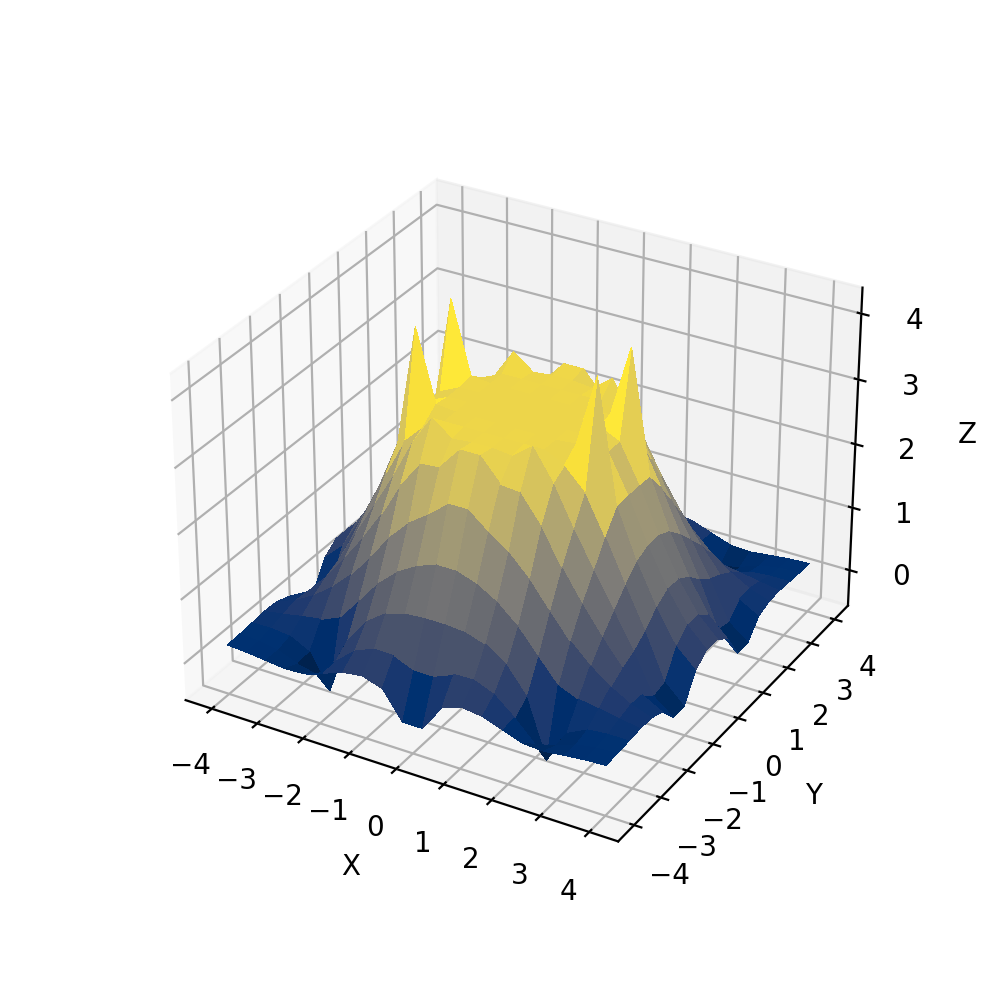

In [32]:
%matplotlib notebook
from matplotlib import cm

fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

# surf = ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1)

#fig.colorbar(surf, shrink=0.5, aspect=10)
surf = ax.plot_surface(xx_, yy_, zz_, rstride=1, cstride=1, linewidth=1, antialiased=False, cmap=cm.cividis)


rstride = 10
cstride = 10
# ax.plot_surface(Xc, Yc, Zc, alpha=0.8, rstride=rstride, cstride=cstride)
# ax.plot_surface(Xc, -Yc, Zc, alpha=0.8, rstride=rstride, cstride=cstride)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [31]:
A

array([[ 0.07401862, -0.04326274, -0.1458311 , -0.17370003, -0.164465  ,
        -0.21264805, -0.164465  , -0.17370003, -0.1458311 , -0.04326274,
        -0.06931472, -0.09769199, -0.13558793, -0.16083221, -0.17474087,
        -0.17917595, -0.17474087, -0.16083221, -0.13558793, -0.09769199],
       [-0.04326274,  0.07401862, -0.04326274, -0.1458311 , -0.17370003,
        -0.164465  , -0.21264805, -0.164465  , -0.17370003, -0.1458311 ,
        -0.09769199, -0.06931472, -0.09769199, -0.13558793, -0.16083221,
        -0.17474087, -0.17917595, -0.17474087, -0.16083221, -0.13558793],
       [-0.1458311 , -0.04326274,  0.07401862, -0.04326274, -0.1458311 ,
        -0.17370003, -0.164465  , -0.21264805, -0.164465  , -0.17370003,
        -0.13558793, -0.09769199, -0.06931472, -0.09769199, -0.13558793,
        -0.16083221, -0.17474087, -0.17917595, -0.17474087, -0.16083221],
       [-0.17370003, -0.1458311 , -0.04326274,  0.07401862, -0.04326274,
        -0.1458311 , -0.17370003, -0.164465  , -

In [29]:
# [print(np.round(G1[i], 8)) for i in range(n)]


In [30]:
[print(np.round(G2[i], 8)) for i in range(n)]



NameError: name 'n' is not defined

In [ ]:
[print(np.round(G3[i], 8)) for i in range(n)]

In [ ]:
[print(np.round(G4[i], 15)) for i in range(n)]
LA.det(G4)